In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/기계학습/admit.txt',names=['ex1','ex2','Admitted'])
print(data)
X=np.c_[data['ex1'],data['ex2']]#점수
y=data['Admitted']
m=len(data)
print(X.shape, y.shape)

          ex1        ex2  Admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
3   60.182599  86.308552         1
4   79.032736  75.344376         1
..        ...        ...       ...
95  83.489163  48.380286         1
96  42.261701  87.103851         1
97  99.315009  68.775409         1
98  55.340018  64.931938         1
99  74.775893  89.529813         1

[100 rows x 3 columns]
(100, 2) (100,)


In [7]:
pos=[]
neg=[]
for (i,val) in enumerate(y):
  if val==1:
    pos.append(i)
  else:
    neg.append(i)
print(pos)
print(neg)

[3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 18, 19, 21, 24, 25, 26, 30, 31, 33, 37, 40, 42, 46, 47, 48, 49, 50, 51, 52, 56, 58, 59, 60, 66, 68, 69, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 87, 88, 90, 91, 93, 94, 95, 96, 97, 98, 99]
[0, 1, 2, 5, 10, 11, 14, 17, 20, 22, 23, 27, 28, 29, 32, 34, 35, 36, 38, 39, 41, 43, 44, 45, 53, 54, 55, 57, 61, 62, 63, 64, 65, 67, 70, 78, 79, 86, 89, 92]


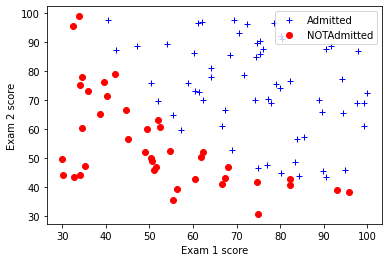

In [13]:
import matplotlib.pyplot as plt
plt.plot(X[pos,0].reshape(-1),X[pos,1].reshape(-1),'b+',label='Admitted')
plt.plot(X[neg,0].reshape(-1),X[neg,1].reshape(-1),'ro',label='NOTAdmitted')
plt.xlabel("Exam 1 score")# 집크기 
plt.ylabel("Exam 2 score")#매매가
plt.legend(loc='upper right')
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(solver='liblinear', C=10) #C가 클수록 규제 감소
log_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
log_reg.predict([[30,70],[50,90]])

array([0, 1])

In [17]:
x_min,x_max=X[:,0].min(),X[:,0].max()
y_min,y_max=X[:,1].min(),X[:,1].max()
h=.2
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z=log_reg.predict(np.c_[xx.ravel(),yy.ravel()])

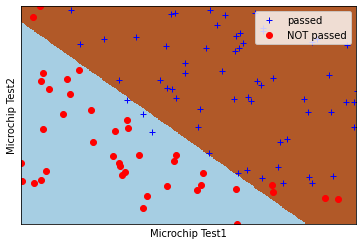

In [18]:
Z=Z.reshape(xx.shape)
plt.figure(1)
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.plot(X[pos,0].reshape(-1),X[pos,1].reshape(-1),'b+',label='passed')
plt.plot(X[neg,0].reshape(-1),X[neg,1].reshape(-1),'ro',label='NOT passed')
plt.xlabel("Microchip Test1")
plt.ylabel("Microchip Test2")
plt.legend(loc='upper right')

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## 2.로지스틱 회귀+정규화


In [19]:
import numpy as np
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/기계학습/qa.txt',names=['t1','t2','passed'])
print(data)
X=np.c_[data['t1'],data['t2']]#점수
y=data['passed']
m=len(data)
print(X.shape, y.shape)

           t1        t2  passed
0    0.051267  0.699560       1
1   -0.092742  0.684940       1
2   -0.213710  0.692250       1
3   -0.375000  0.502190       1
4   -0.513250  0.465640       1
..        ...       ...     ...
113 -0.720620  0.538740       0
114 -0.593890  0.494880       0
115 -0.484450  0.999270       0
116 -0.006336  0.999270       0
117  0.632650 -0.030612       0

[118 rows x 3 columns]
(118, 2) (118,)


In [20]:
pos=[]
neg=[]
for (i,val) in enumerate(y):
  if val==1:
    pos.append(i)
  else:
    neg.append(i)
print(pos)
print(neg)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]


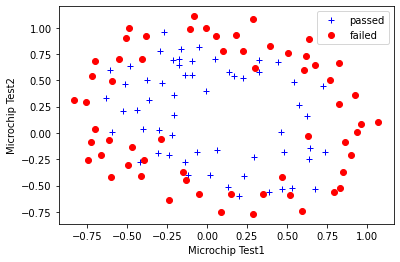

In [21]:
import matplotlib.pyplot as plt
plt.plot(X[pos,0].reshape(-1),X[pos,1].reshape(-1),'b+',label='passed')
plt.plot(X[neg,0].reshape(-1),X[neg,1].reshape(-1),'ro',label='failed')
plt.xlabel("Microchip Test1")
plt.ylabel("Microchip Test2")
plt.legend(loc='upper right')
plt.show()

In [23]:
from sklearn.preprocessing import PolynomialFeatures
degree=6
poly_features= PolynomialFeatures(degree=degree,include_bias=False)
X_poly=poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])
print(X_poly[0].shape)

[0.051267 0.69956 ]
[5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]
(27,)


In [24]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(penalty='l2',solver='liblinear',C=1e-1)
log_reg.fit(X_poly,y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
u=np.linspace(-1,1.5,300)
v=np.linspace(-1,1.5,300)
z=np.zeros((len(u),len(v)))
for i in range(len(u)):
  a=[]
  for j in range(len(v)):
    a.append(np.array([u[i],v[j]]))

  my_data=poly_features.fit_transform(a)
  z[i]=log_reg.predict(my_data)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: No contour levels were found within the data range.
  """Entry point for launching an IPython kernel.


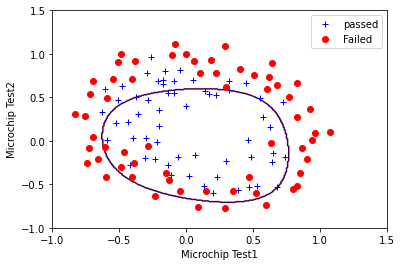

In [30]:
plt.contour(u,v,z,0)

plt.plot(X[pos,0].reshape(-1),X[pos,1].reshape(-1),'b+',label='passed')
plt.plot(X[neg,0].reshape(-1),X[neg,1].reshape(-1),'ro',label='Failed')
plt.xlabel("Microchip Test1")
plt.ylabel("Microchip Test2")
plt.legend(loc='upper right')
plt.show()

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0
 0 0 0 1 0 0 0]
[[46 14]
 [16 42]]


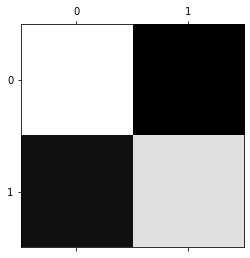

precision_score: 0.75
recall score: 0.7241379310344828
F1_score: 0.736842105263158


In [34]:
#1.Y값 예측
y_pred=log_reg.predict(X_poly)
print(y_pred)

#2.confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y,y_pred)
print(conf_mat)
plt.matshow(conf_mat,cmap=plt.cm.gray)
plt.show()

#3.precision &&recall
from sklearn.metrics import precision_score,recall_score
print("precision_score:",precision_score(y,y_pred))
print("recall score:",recall_score(y,y_pred))

#4.F1 score
from sklearn.metrics import f1_score
print("F1_score:",f1_score(y,y_pred))